In [45]:
import AutoKeras as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import display
from PIL import Image
from numpy.random.mtrand import RandomState
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%matplotlib inline

seed = 42
time_limit_mins = 5

In [108]:
np.random.seed(seed)
random_state = RandomState(seed)

x, y = load_digits(return_X_y=True)
x = x.astype(np.uint8)
y = y.astype(np.uint8)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=random_state)
s = np.sqrt(len(x_train[0])).astype(int)

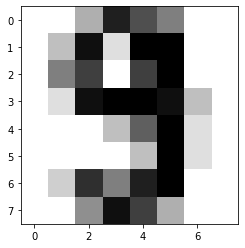

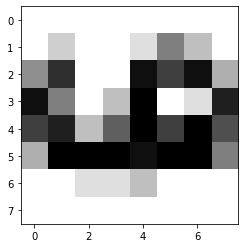

In [120]:
np.random.seed(seed)
random_state = RandomState(seed)

def show_img(arr):
    plt.imshow(arr.reshape(s, s), cmap="gray_r")
    plt.show()

def rotate(arr, err_param):
    arr = arr.reshape(s, s).astype(float)
    
    angle = random_state.uniform(-err_param, err_param)
    img = Image.fromarray(arr).rotate(angle)
    arr = np.asarray(img)
    
    arr = np.round(arr).flatten().astype(np.uint8)
    return arr

show_img(x_train[1])
show_img(rotate(x_train[1], 180))

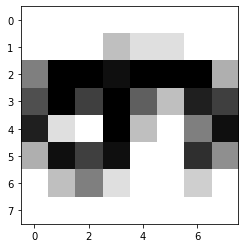

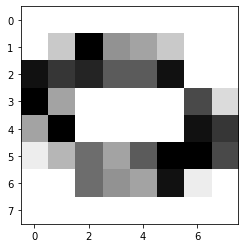

In [102]:
np.random.seed(seed)
random_state = RandomState(seed)

err_params = np.linspace(0, 180, num=6)
err_x_train_list = [np.apply_along_axis(rotate, 1, x_train, ep) for ep in err_params]
err_x_test_list = [np.apply_along_axis(rotate, 1, x_test, ep) for ep in err_params]
show_img(err_x_train_list[5][1])
show_img(err_x_test_list[5][1])

In [ ]:
np.random.seed(seed)
random_state = RandomState(seed)

def get_fitted_model(x_train, y_train):
    x_train = x_train.reshape((len(x_train), s, s, 1))
    clf = ak.ImageClassifier(augment=True, path=generate_tmpdir(), verbose=False)
    clf.fit(x_train, y_train, time_limit=60*self.time_limit_mins)
    return clf


def get_score(x_train, y_train):
       pass 

scores = {"accuracy": []}
for err_x_train in err_x_train_list:
    clf = get_fitted_model(err_x_train, y_train)
    for err_x_test in err_x_test_list:
        scores["accuracy"].append(get_score(err_x_test, y_test))

scores_df = pd.DataFrame(scores)
scores_df